# Decision Tree and Random Forest - Petrol Consumption

Our goal is to predict the gas consumption (in millions of gallons) in 48 of the US states based on petrol tax (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population with the driving license.

Here are what the columns represent:

* Petrol_tax: amount of petrol tax in cents per gallon
* Average_income: average income of the state residents in dollars
* Paved_Highways: length of paved highways in miles
* Population_Driver_license(%): proportion of state residents with driving licenses
* Petrol_Consumption: gas consumption in the state (in millions of gallons)

# Import Libraries

**Import the usual libraries for pandas, numpy and plotting.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/pinarozturk/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Get the Data

**Use pandas to read petrol_consumption.csv as a dataframe called consumption.**

In [2]:
consumption = pd.read_csv('petrol_consumption.csv')

**Check out the info(), head(), and describe() methods on loans.**

In [3]:
consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [4]:
consumption.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [5]:
consumption.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


# Exploratory Data Analysis

<AxesSubplot:xlabel='Petrol_Consumption', ylabel='Count'>

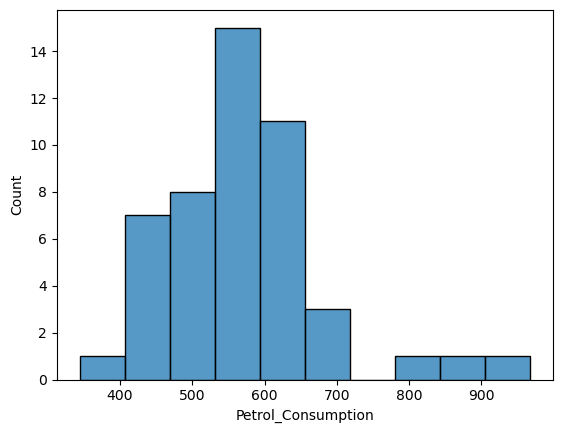

In [6]:
#consumption["Petrol_Consumption"].plot.hist()
sns.histplot(consumption["Petrol_Consumption"])

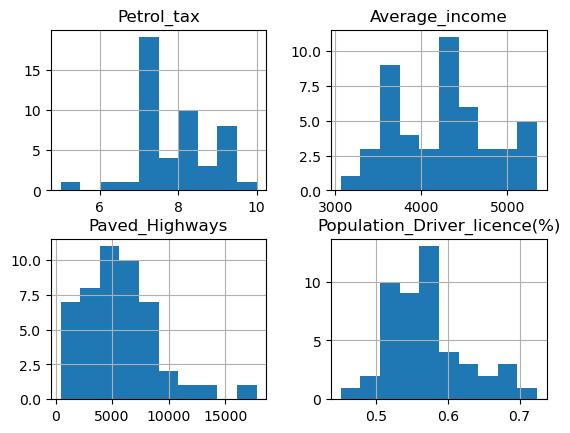

In [7]:
viz = consumption[["Petrol_tax","Average_income","Paved_Highways","Population_Driver_licence(%)"]]
viz.hist()
plt.show()

## Separate dataset into X and y

In [8]:
X = consumption[["Petrol_tax","Average_income","Paved_Highways","Population_Driver_licence(%)"]]
y = consumption['Petrol_Consumption']

## Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

**Import DecisionTreeRegressor** we use regression because our y variable (Petrol_consumption) is continuous

In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
dtree = DecisionTreeRegressor(random_state=42,max_depth=2)

In [12]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and calculate regression errors.**

In [13]:
predictions = dtree.predict(X_test)

In [14]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 65.10476190476193
Mean Squared Error: 5521.537986555571
Root Mean Squared Error: 74.30705206476415


## Feature Importance

Among the feature we have (Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)), which one(s) are more imortant (better to split at)?

In [15]:
print(dict(zip(X.columns, dtree.feature_importances_)))

{'Petrol_tax': 0.0, 'Average_income': 0.3817089537397322, 'Paved_Highways': 0.0, 'Population_Driver_licence(%)': 0.6182910462602678}


## Tree Visualization



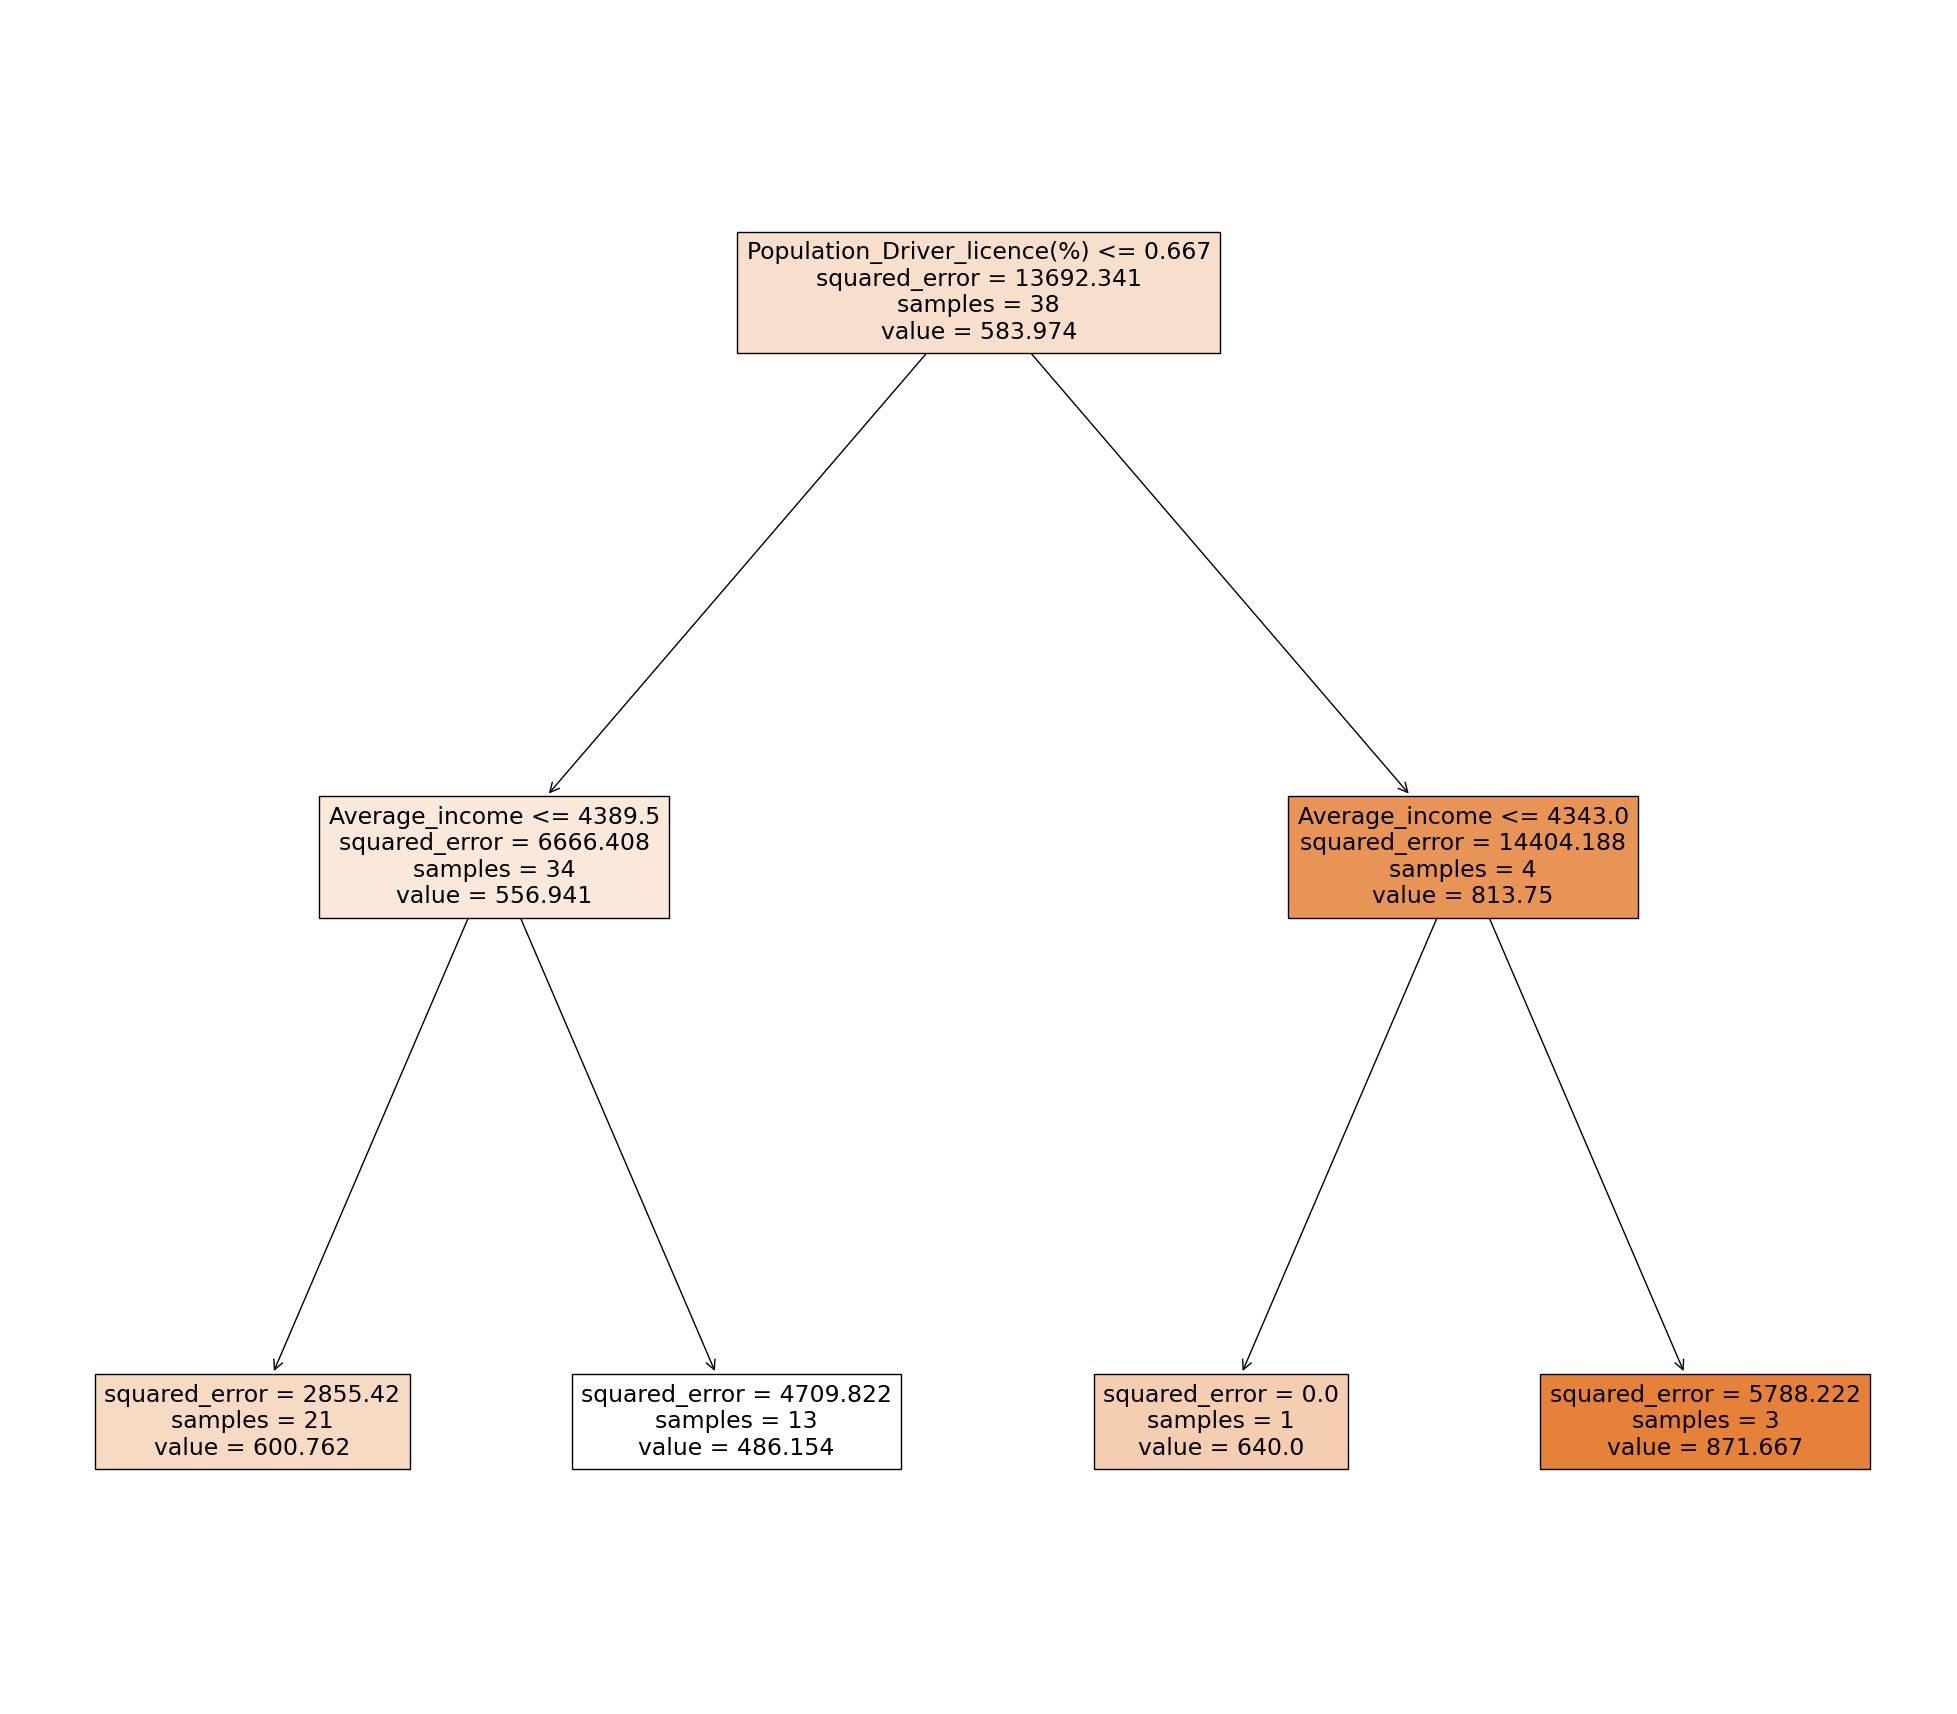

In [16]:
from sklearn import tree
fig = plt.figure(figsize = (25,22))
tree_viz = tree.plot_tree(dtree, 
                         feature_names = X_train.columns,
                         class_names = y_train.values,
                         filled=True)

## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestRegressor class and fit it to our training data from the previous step.**

In [17]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

In [18]:
y_pred = regressor.predict(X_test)

In [19]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 50.535999999999994
Mean Squared Error: 3764.6069200000006
Root Mean Squared Error: 61.3563926579782
